# 03 - Feature Analysis

This notebook focuses on analyzing individual features (both categorical and numerical) in the enriched FIPE datasets. We'll examine:
- Categorical features: distributions, frequencies, and cardinality
- Numerical features: distributions, trends, and relationships
- Feature characteristics and potential issues

## Datasets
- `fipe_cars_enriched.csv`: Historical FIPE data (~599k records)
- `fipe_2022_enriched.csv`: 2022 FIPE data subset (~290k records)


In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import sys
from collections import Counter

# Add src to path to import our modules
project_root = Path().resolve().parent
sys.path.insert(0, str(project_root / "src"))

from data.loader import DatasetLoader

# Configuration
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Set style for plots
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

print("✅ Imports completed successfully")


✅ Imports completed successfully


## 1. Load Datasets


In [2]:
# Initialize loader
loader = DatasetLoader()

# Load both datasets
df_cars, df_2022 = loader.load_all()

print("\n" + "="*60)
print("Datasets loaded successfully!")
print("="*60)


Loading /app/data/processed/fipe_cars_enriched.csv...
Loaded 599,007 rows and 16 columns
Loading /app/data/processed/fipe_2022_enriched.csv...
Loaded 290,275 rows and 16 columns

Datasets loaded successfully!


## 2. Categorical Features Analysis

We'll analyze all categorical features:
- Brand distribution and frequency
- Model distribution
- State/city distribution
- Fuel type, transmission, color distributions
- Condition distribution


In [3]:
# Identify categorical columns
categorical_cols = df_cars.select_dtypes(include=['object']).columns.tolist()
print("Categorical columns:")
for i, col in enumerate(categorical_cols, 1):
    unique_count = df_cars[col].nunique()
    print(f"  {i}. {col} ({unique_count} unique values)")

print(f"\nTotal categorical columns: {len(categorical_cols)}")


Categorical columns:
  1. brand (87 unique values)
  2. model (6171 unique values)
  3. state (27 unique values)
  4. city (131 unique values)
  5. fuel_type (3 unique values)
  6. transmission (2 unique values)
  7. color (10 unique values)
  8. condition (4 unique values)
  9. month_of_reference (12 unique values)

Total categorical columns: 9


### 2.1 Brand Distribution


Brand Distribution Analysis

Total unique brands: 87

Top 20 brands by frequency:
------------------------------------------------------------
VW - VolksWagen                  58,386 ( 9.75%)
GM - Chevrolet                   58,161 ( 9.71%)
Fiat                             55,087 ( 9.20%)
Ford                             50,201 ( 8.38%)
Mercedes-Benz                    35,982 ( 6.01%)
Renault                          31,342 ( 5.23%)
Audi                             24,883 ( 4.15%)
Peugeot                          22,921 ( 3.83%)
Toyota                           21,241 ( 3.55%)
Mitsubishi                       21,091 ( 3.52%)
BMW                              20,713 ( 3.46%)
Citroën                          18,192 ( 3.04%)
Hyundai                          15,351 ( 2.56%)
Nissan                           14,365 ( 2.40%)
Land Rover                       14,259 ( 2.38%)
Porsche                          13,841 ( 2.31%)
Volvo                            12,574 ( 2.10%)
Honda                   

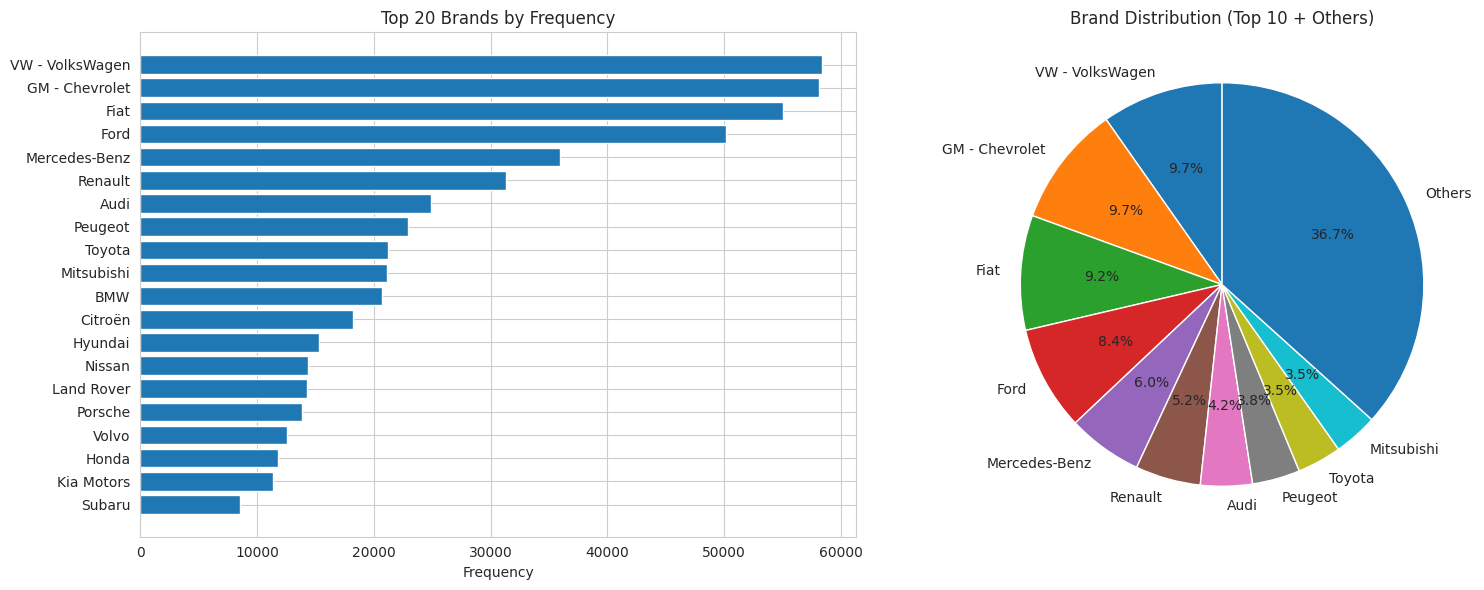


Brand concentration:
  Top 10 brands represent 63.32% of data
  Top 20 brands represent 86.87% of data


In [4]:
# Brand analysis
print("="*60)
print("Brand Distribution Analysis")
print("="*60)

brand_counts = df_cars['brand'].value_counts()
brand_pct = (brand_counts / len(df_cars)) * 100

print(f"\nTotal unique brands: {df_cars['brand'].nunique()}")
print(f"\nTop 20 brands by frequency:")
print("-" * 60)
top_brands = brand_counts.head(20)
for brand, count in top_brands.items():
    pct = brand_pct[brand]
    print(f"{brand:30s} {count:8,} ({pct:5.2f}%)")

# Visualize top brands
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Bar plot - top 20 brands
top_20_brands = brand_counts.head(20)
axes[0].barh(range(len(top_20_brands)), top_20_brands.values)
axes[0].set_yticks(range(len(top_20_brands)))
axes[0].set_yticklabels(top_20_brands.index)
axes[0].set_xlabel('Frequency')
axes[0].set_title('Top 20 Brands by Frequency')
axes[0].invert_yaxis()

# Pie chart - top 10 brands + others
top_10_brands = brand_counts.head(10)
others_count = brand_counts.iloc[10:].sum()
pie_data = list(top_10_brands.values) + [others_count]
pie_labels = list(top_10_brands.index) + ['Others']
axes[1].pie(pie_data, labels=pie_labels, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Brand Distribution (Top 10 + Others)')

plt.tight_layout()
plt.show()

print(f"\nBrand concentration:")
print(f"  Top 10 brands represent {brand_pct.head(10).sum():.2f}% of data")
print(f"  Top 20 brands represent {brand_pct.head(20).sum():.2f}% of data")


### 2.2 Model Distribution


Model Distribution Analysis

Total unique models: 6171

Top 30 models by frequency:
--------------------------------------------------------------------------------
Buggy/M-8/M-8 Long 1.6                                  898 ( 0.15%)
Buggy Plus 1.6 8V                                       860 ( 0.14%)
Buggy 1.6/ TST/ RS 1.6 4-Lug.                           785 ( 0.13%)
Forester 2.0/2.0 S/2.0 ES 4x4 Aut.                      580 ( 0.10%)
Corvette 5.7/ 6.0, 6.2 Targa/Stingray                   550 ( 0.09%)
Santana 1.8 Mi                                          550 ( 0.09%)
911 Turbo Coupe 3.6/3.8 (991/992)                       531 ( 0.09%)
Jimny Wide/ Jimny/4ALL 1.3 16V                          523 ( 0.09%)
Partner Furgão 1.6 16V/ 1.6 16V Flex 3p                 515 ( 0.09%)
Saveiro CL 1.6 Mi / CL/ C 1.6                           500 ( 0.08%)
S-600 L/ L Classic/ Wagon Classic 6.0                   500 ( 0.08%)
Fiorino Furg.1.5/1.3/1.3 Fire/1.3 F.Flex                500 ( 0.08%)
Buggy 2

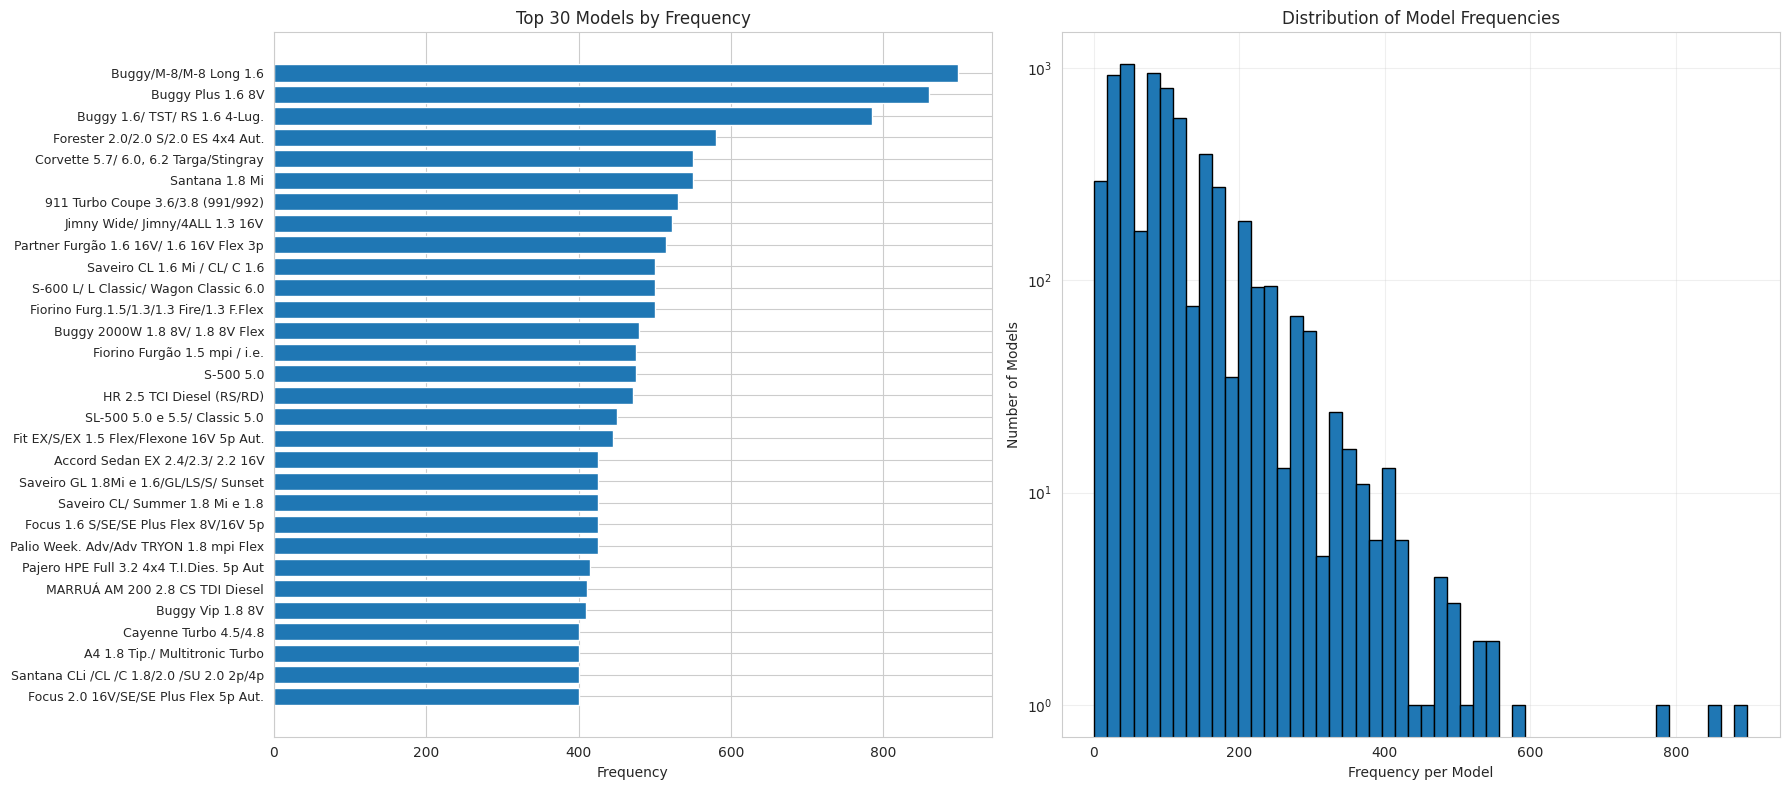


Model concentration:
  Top 10 models represent 1.05% of data
  Top 30 models represent 2.51% of data
  Top 100 models represent 6.61% of data

  Models appearing only once: 1 (0.02%)


In [5]:
# Model analysis
print("="*60)
print("Model Distribution Analysis")
print("="*60)

model_counts = df_cars['model'].value_counts()
model_pct = (model_counts / len(df_cars)) * 100

print(f"\nTotal unique models: {df_cars['model'].nunique()}")
print(f"\nTop 30 models by frequency:")
print("-" * 80)
top_models = model_counts.head(30)
for model, count in top_models.items():
    pct = model_pct[model]
    print(f"{model:50s} {count:8,} ({pct:5.2f}%)")

# Visualize top models
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Bar plot - top 30 models
top_30_models = model_counts.head(30)
axes[0].barh(range(len(top_30_models)), top_30_models.values)
axes[0].set_yticks(range(len(top_30_models)))
axes[0].set_yticklabels(top_30_models.index, fontsize=9)
axes[0].set_xlabel('Frequency')
axes[0].set_title('Top 30 Models by Frequency')
axes[0].invert_yaxis()

# Distribution of model frequencies
axes[1].hist(model_counts.values, bins=50, edgecolor='black')
axes[1].set_xlabel('Frequency per Model')
axes[1].set_ylabel('Number of Models')
axes[1].set_title('Distribution of Model Frequencies')
axes[1].set_yscale('log')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nModel concentration:")
print(f"  Top 10 models represent {model_pct.head(10).sum():.2f}% of data")
print(f"  Top 30 models represent {model_pct.head(30).sum():.2f}% of data")
print(f"  Top 100 models represent {model_pct.head(100).sum():.2f}% of data")

# Models with very low frequency
low_freq_models = (model_counts == 1).sum()
print(f"\n  Models appearing only once: {low_freq_models} ({low_freq_models/len(model_counts)*100:.2f}%)")


### 2.3 State Distribution


State Distribution Analysis

Total unique states: 27

State distribution:
------------------------------------------------------------
SP     138,364 (23.10%)
MG      62,508 (10.44%)
RJ      49,738 ( 8.30%)
BA      43,854 ( 7.32%)
RS      31,421 ( 5.25%)
PR      31,295 ( 5.22%)
PE      25,189 ( 4.21%)
CE      25,165 ( 4.20%)
GO      18,930 ( 3.16%)
MA      18,805 ( 3.14%)
DF      18,800 ( 3.14%)
SC      18,784 ( 3.14%)
PB      12,664 ( 2.11%)
AM      12,662 ( 2.11%)
ES      12,641 ( 2.11%)
PA      12,572 ( 2.10%)
MT      12,418 ( 2.07%)
AL       6,458 ( 1.08%)
PI       6,305 ( 1.05%)
MS       6,265 ( 1.05%)
SE       6,215 ( 1.04%)
RO       6,184 ( 1.03%)
TO       6,137 ( 1.02%)
RN       6,122 ( 1.02%)
AP       3,231 ( 0.54%)
AC       3,183 ( 0.53%)
RR       3,097 ( 0.52%)


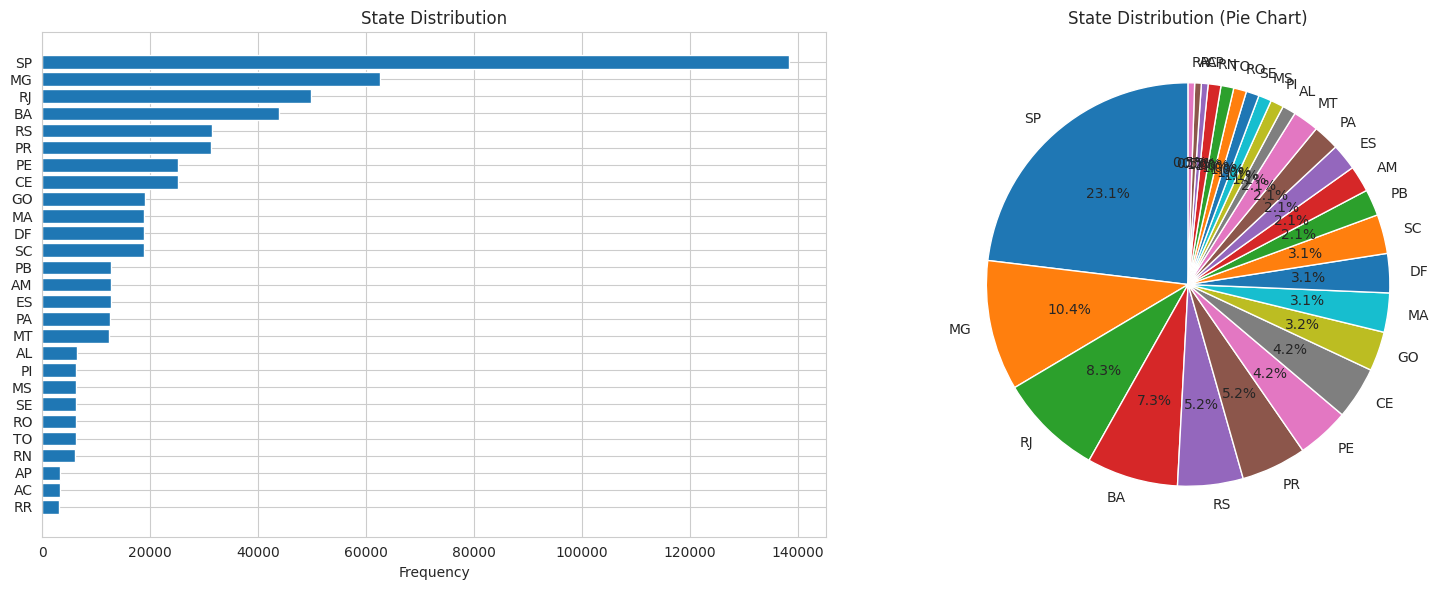


State concentration:
  Top 5 states represent 54.40% of data
  Top 10 states represent 74.33% of data


In [6]:
# State analysis
print("="*60)
print("State Distribution Analysis")
print("="*60)

state_counts = df_cars['state'].value_counts()
state_pct = (state_counts / len(df_cars)) * 100

print(f"\nTotal unique states: {df_cars['state'].nunique()}")
print(f"\nState distribution:")
print("-" * 60)
for state, count in state_counts.items():
    pct = state_pct[state]
    print(f"{state:5s} {count:8,} ({pct:5.2f}%)")

# Visualize state distribution
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Bar plot
axes[0].barh(range(len(state_counts)), state_counts.values)
axes[0].set_yticks(range(len(state_counts)))
axes[0].set_yticklabels(state_counts.index)
axes[0].set_xlabel('Frequency')
axes[0].set_title('State Distribution')
axes[0].invert_yaxis()

# Pie chart
axes[1].pie(state_counts.values, labels=state_counts.index, autopct='%1.1f%%', startangle=90)
axes[1].set_title('State Distribution (Pie Chart)')

plt.tight_layout()
plt.show()

print(f"\nState concentration:")
print(f"  Top 5 states represent {state_pct.head(5).sum():.2f}% of data")
print(f"  Top 10 states represent {state_pct.head(10).sum():.2f}% of data")


### 2.4 City Distribution


City Distribution Analysis

Total unique cities: 131

Top 30 cities by frequency:
------------------------------------------------------------
São Paulo                        27,822 ( 4.64%)
Santo André                      27,726 ( 4.63%)
Guarulhos                        27,682 ( 4.62%)
Campinas                         27,632 ( 4.61%)
São Bernardo do Campo            27,502 ( 4.59%)
Brasília                         18,800 ( 3.14%)
Contagem                         12,551 ( 2.10%)
Juiz de Fora                     12,516 ( 2.09%)
Uberlândia                       12,493 ( 2.09%)
Betim                            12,477 ( 2.08%)
Belo Horizonte                   12,471 ( 2.08%)
São Gonçalo                      10,007 ( 1.67%)
Rio de Janeiro                    9,979 ( 1.67%)
Niterói                           9,961 ( 1.66%)
Nova Iguaçu                       9,902 ( 1.65%)
Duque de Caxias                   9,889 ( 1.65%)
Vitória da Conquista              8,855 ( 1.48%)
Juazeiro                

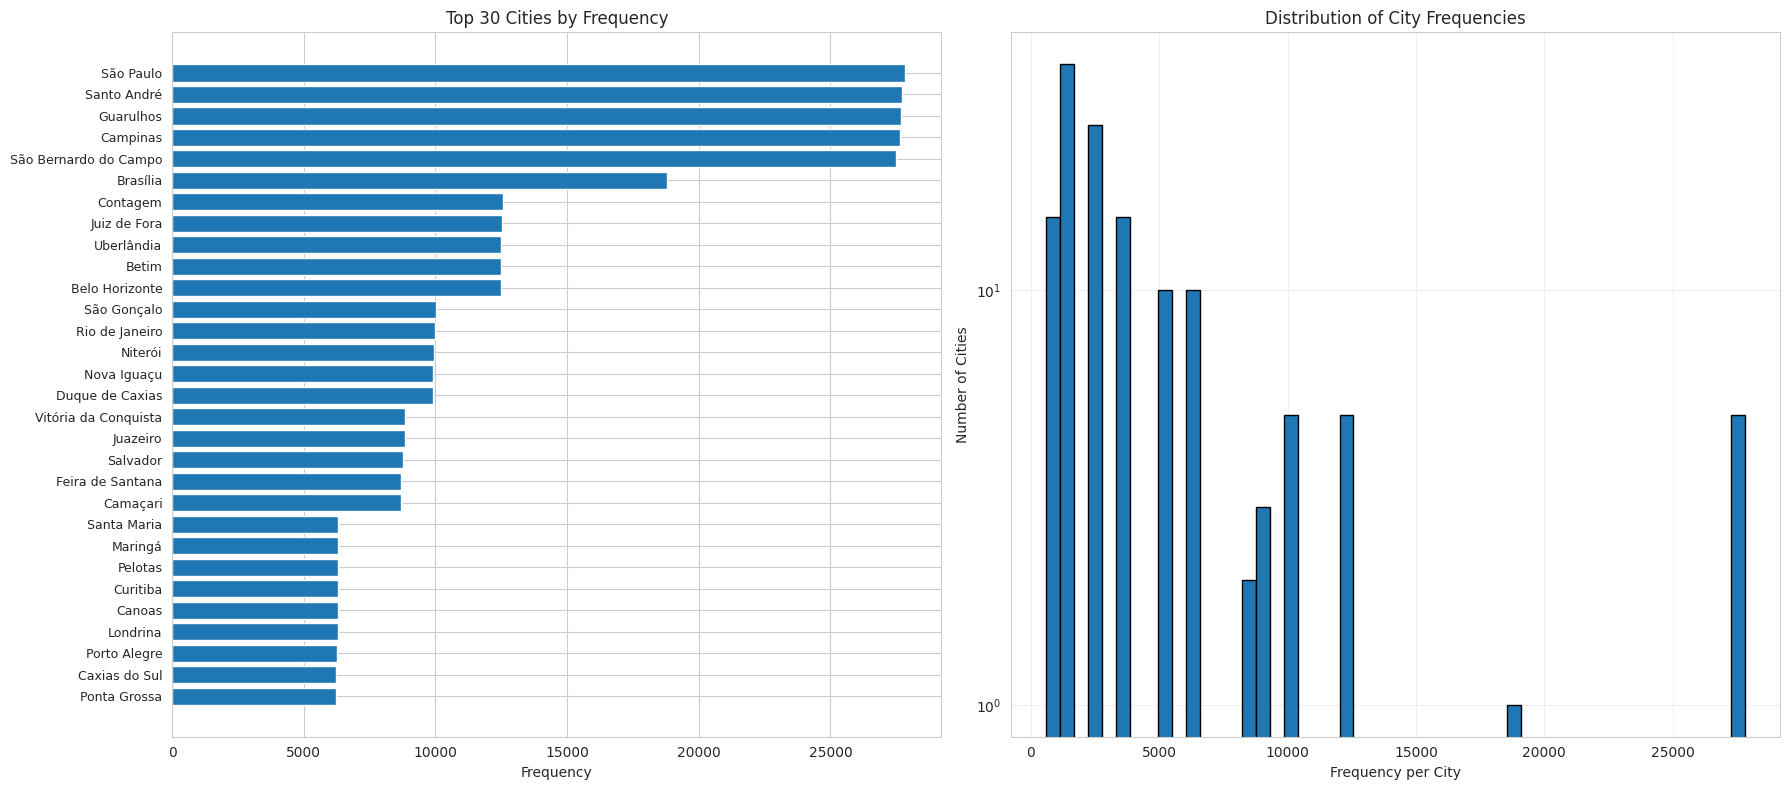


City concentration:
  Top 10 cities represent 34.59% of data
  Top 30 cities represent 61.74% of data


In [7]:
# City analysis
print("="*60)
print("City Distribution Analysis")
print("="*60)

city_counts = df_cars['city'].value_counts()
city_pct = (city_counts / len(df_cars)) * 100

print(f"\nTotal unique cities: {df_cars['city'].nunique()}")
print(f"\nTop 30 cities by frequency:")
print("-" * 60)
top_cities = city_counts.head(30)
for city, count in top_cities.items():
    pct = city_pct[city]
    print(f"{city:30s} {count:8,} ({pct:5.2f}%)")

# Visualize top cities
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Bar plot - top 30 cities
top_30_cities = city_counts.head(30)
axes[0].barh(range(len(top_30_cities)), top_30_cities.values)
axes[0].set_yticks(range(len(top_30_cities)))
axes[0].set_yticklabels(top_30_cities.index, fontsize=9)
axes[0].set_xlabel('Frequency')
axes[0].set_title('Top 30 Cities by Frequency')
axes[0].invert_yaxis()

# Distribution of city frequencies
axes[1].hist(city_counts.values, bins=50, edgecolor='black')
axes[1].set_xlabel('Frequency per City')
axes[1].set_ylabel('Number of Cities')
axes[1].set_title('Distribution of City Frequencies')
axes[1].set_yscale('log')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nCity concentration:")
print(f"  Top 10 cities represent {city_pct.head(10).sum():.2f}% of data")
print(f"  Top 30 cities represent {city_pct.head(30).sum():.2f}% of data")


### 2.5 Fuel Type Distribution


Fuel Type Distribution Analysis

Total unique fuel types: 3

Fuel type distribution:
------------------------------------------------------------
Gasoline              493,501 (82.39%)
Diesel                 96,148 (16.05%)
Alcohol                 9,358 ( 1.56%)


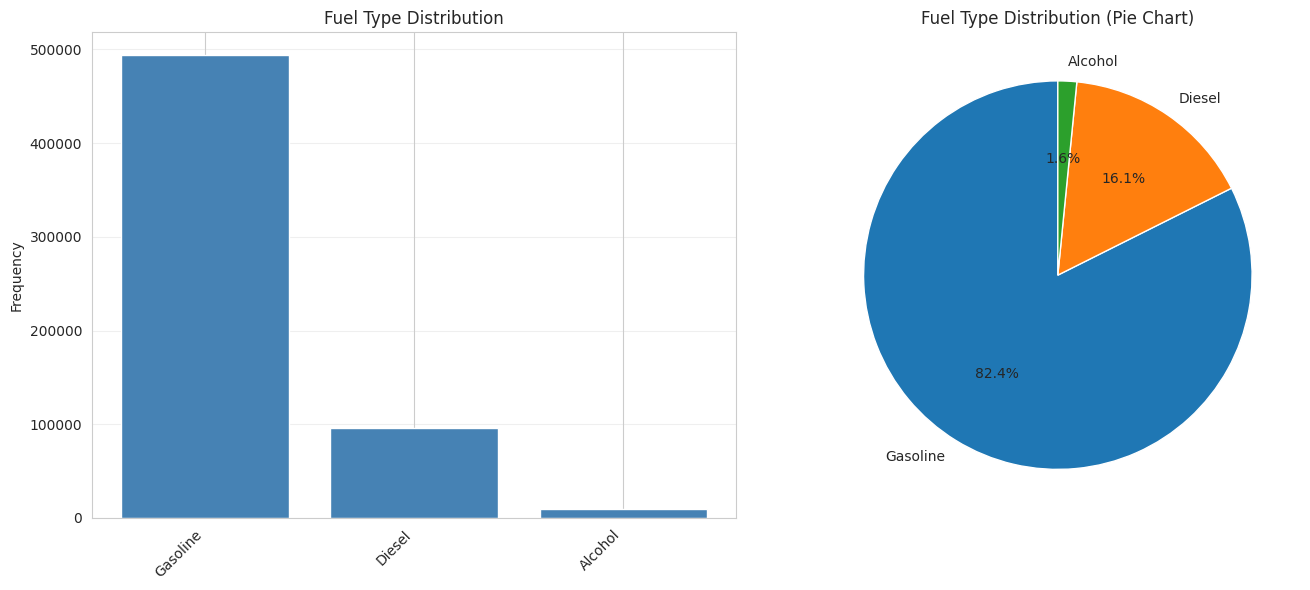

In [8]:
# Fuel type analysis
print("="*60)
print("Fuel Type Distribution Analysis")
print("="*60)

fuel_counts = df_cars['fuel_type'].value_counts()
fuel_pct = (fuel_counts / len(df_cars)) * 100

print(f"\nTotal unique fuel types: {df_cars['fuel_type'].nunique()}")
print(f"\nFuel type distribution:")
print("-" * 60)
for fuel, count in fuel_counts.items():
    pct = fuel_pct[fuel]
    print(f"{fuel:20s} {count:8,} ({pct:5.2f}%)")

# Visualize fuel type distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Bar plot
axes[0].bar(range(len(fuel_counts)), fuel_counts.values, color='steelblue')
axes[0].set_xticks(range(len(fuel_counts)))
axes[0].set_xticklabels(fuel_counts.index, rotation=45, ha='right')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Fuel Type Distribution')
axes[0].grid(True, alpha=0.3, axis='y')

# Pie chart
axes[1].pie(fuel_counts.values, labels=fuel_counts.index, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Fuel Type Distribution (Pie Chart)')

plt.tight_layout()
plt.show()


### 2.6 Transmission Distribution


Transmission Distribution Analysis

Total unique transmission types: 2

Transmission distribution:
------------------------------------------------------------
manual                435,066 (72.63%)
automatic             163,941 (27.37%)


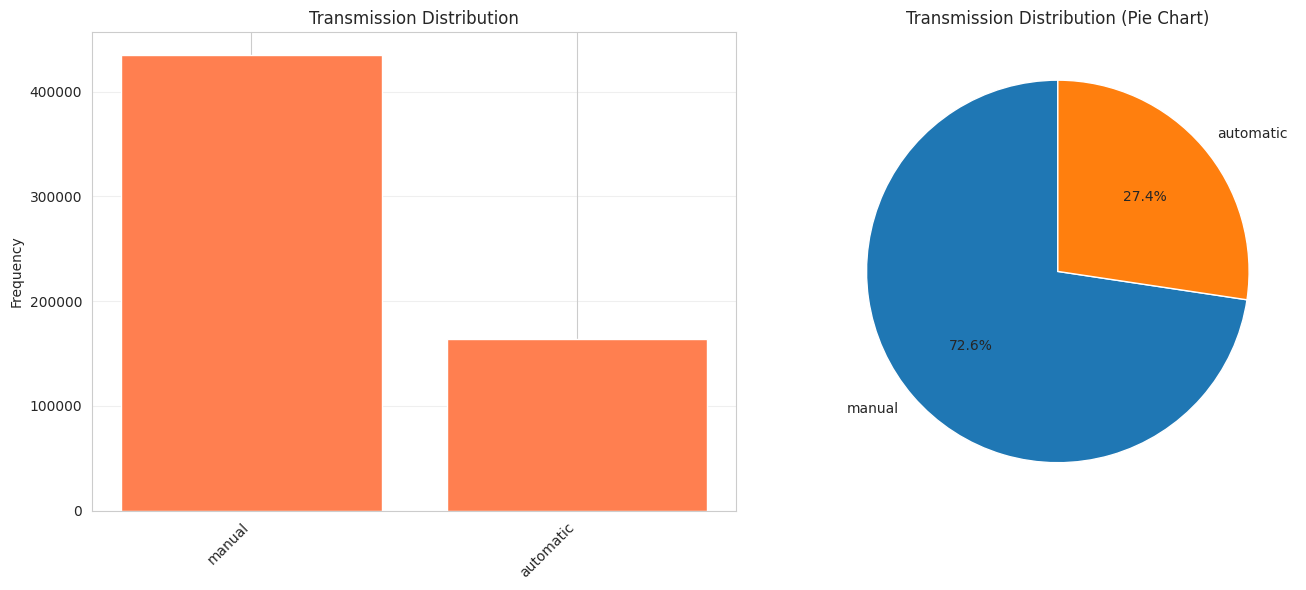

In [9]:
# Transmission analysis
print("="*60)
print("Transmission Distribution Analysis")
print("="*60)

transmission_counts = df_cars['transmission'].value_counts()
transmission_pct = (transmission_counts / len(df_cars)) * 100

print(f"\nTotal unique transmission types: {df_cars['transmission'].nunique()}")
print(f"\nTransmission distribution:")
print("-" * 60)
for trans, count in transmission_counts.items():
    pct = transmission_pct[trans]
    print(f"{trans:20s} {count:8,} ({pct:5.2f}%)")

# Visualize transmission distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Bar plot
axes[0].bar(range(len(transmission_counts)), transmission_counts.values, color='coral')
axes[0].set_xticks(range(len(transmission_counts)))
axes[0].set_xticklabels(transmission_counts.index, rotation=45, ha='right')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Transmission Distribution')
axes[0].grid(True, alpha=0.3, axis='y')

# Pie chart
axes[1].pie(transmission_counts.values, labels=transmission_counts.index, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Transmission Distribution (Pie Chart)')

plt.tight_layout()
plt.show()


### 2.7 Color Distribution


Color Distribution Analysis

Total unique colors: 10

Color distribution:
------------------------------------------------------------
Branco                149,606 (24.98%)
Prata                 119,396 (19.93%)
Preto                  90,119 (15.04%)
Cinza                  59,835 ( 9.99%)
Vermelho               48,185 ( 8.04%)
Azul                   42,076 ( 7.02%)
Bege                   29,931 ( 5.00%)
Verde                  23,809 ( 3.97%)
Marrom                 18,087 ( 3.02%)
Dourado                17,963 ( 3.00%)


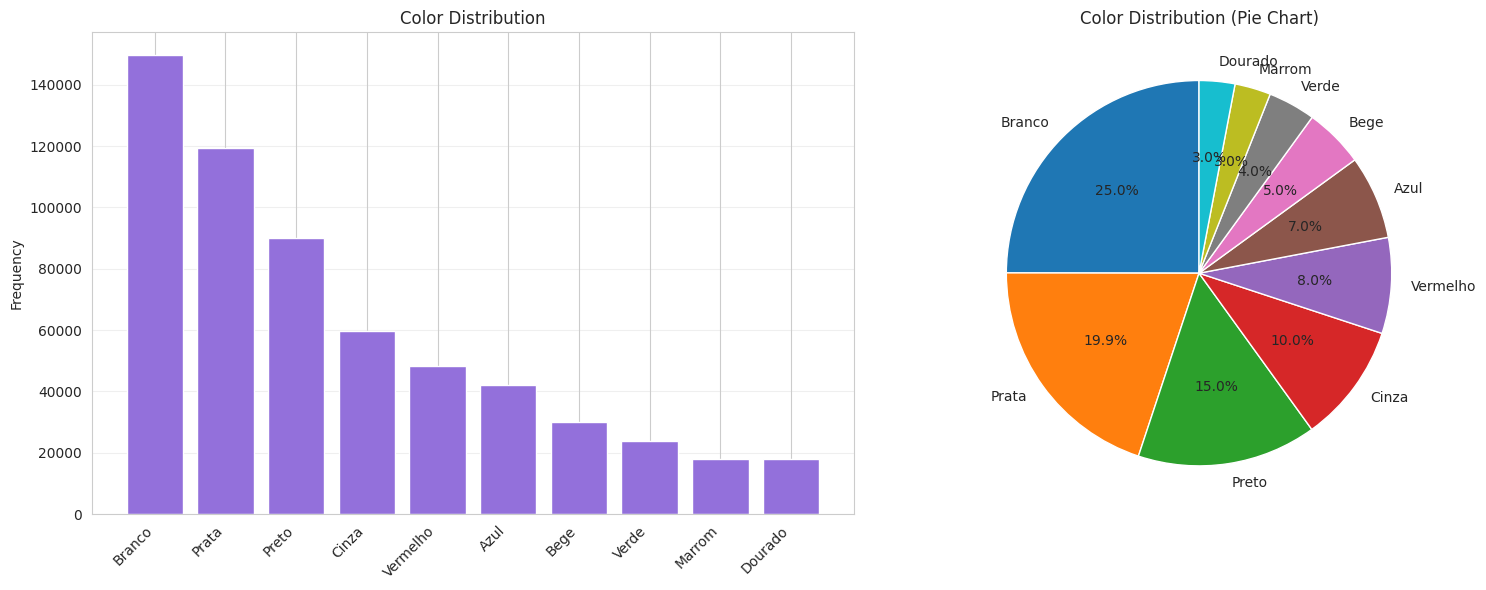

In [10]:
# Color analysis
print("="*60)
print("Color Distribution Analysis")
print("="*60)

color_counts = df_cars['color'].value_counts()
color_pct = (color_counts / len(df_cars)) * 100

print(f"\nTotal unique colors: {df_cars['color'].nunique()}")
print(f"\nColor distribution:")
print("-" * 60)
for color, count in color_counts.items():
    pct = color_pct[color]
    print(f"{color:20s} {count:8,} ({pct:5.2f}%)")

# Visualize color distribution
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Bar plot
axes[0].bar(range(len(color_counts)), color_counts.values, color='mediumpurple')
axes[0].set_xticks(range(len(color_counts)))
axes[0].set_xticklabels(color_counts.index, rotation=45, ha='right')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Color Distribution')
axes[0].grid(True, alpha=0.3, axis='y')

# Pie chart
axes[1].pie(color_counts.values, labels=color_counts.index, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Color Distribution (Pie Chart)')

plt.tight_layout()
plt.show()


### 2.8 Condition Distribution


Condition Distribution Analysis

Total unique conditions: 4

Condition distribution:
------------------------------------------------------------
Excelente              52,937 ( 8.84%)
Ótimo                 106,946 (17.85%)
Bom                   285,996 (47.75%)
Regular               153,128 (25.56%)


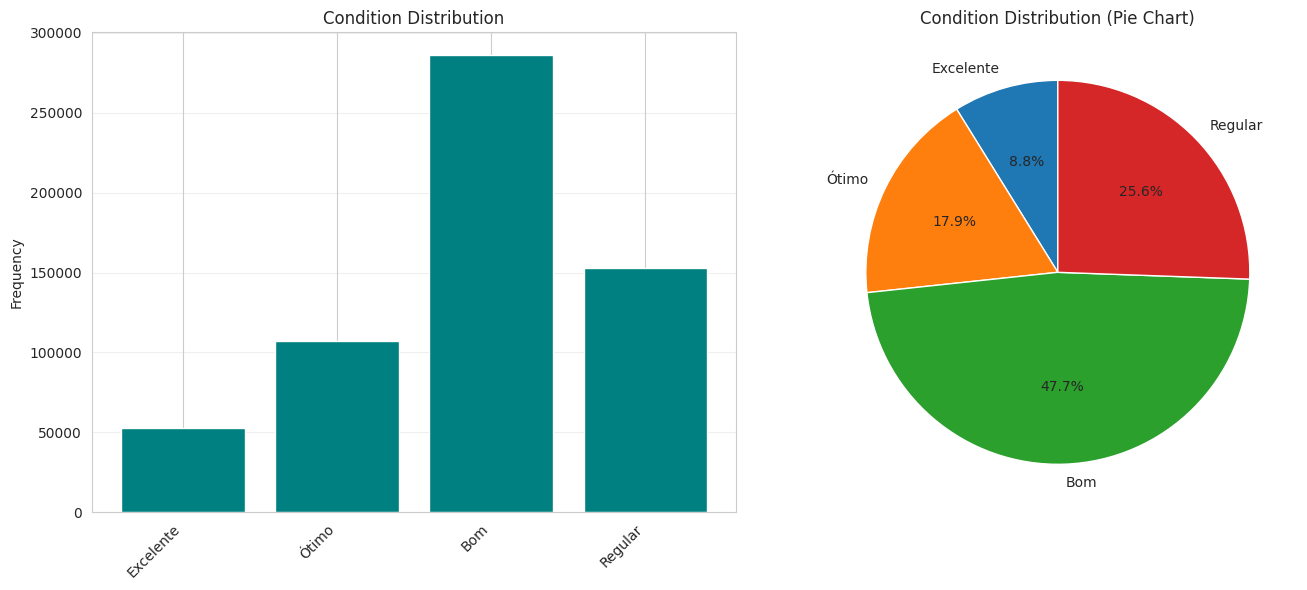

In [11]:
# Condition analysis
print("="*60)
print("Condition Distribution Analysis")
print("="*60)

condition_counts = df_cars['condition'].value_counts()
condition_pct = (condition_counts / len(df_cars)) * 100

# Order conditions logically (if applicable)
condition_order = ['Excelente', 'Ótimo', 'Bom', 'Regular'] if 'Excelente' in condition_counts.index else condition_counts.index
condition_counts_ordered = condition_counts.reindex([c for c in condition_order if c in condition_counts.index])

print(f"\nTotal unique conditions: {df_cars['condition'].nunique()}")
print(f"\nCondition distribution:")
print("-" * 60)
for condition, count in condition_counts_ordered.items():
    pct = condition_pct[condition]
    print(f"{condition:20s} {count:8,} ({pct:5.2f}%)")

# Visualize condition distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Bar plot
axes[0].bar(range(len(condition_counts_ordered)), condition_counts_ordered.values, color='teal')
axes[0].set_xticks(range(len(condition_counts_ordered)))
axes[0].set_xticklabels(condition_counts_ordered.index, rotation=45, ha='right')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Condition Distribution')
axes[0].grid(True, alpha=0.3, axis='y')

# Pie chart
axes[1].pie(condition_counts_ordered.values, labels=condition_counts_ordered.index, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Condition Distribution (Pie Chart)')

plt.tight_layout()
plt.show()


## 3. Numerical Features Analysis

We'll analyze all numerical features:
- Year distribution and trends
- Mileage (km) distribution and relationship with age
- Engine size distribution
- Doors distribution


In [12]:
# Identify numerical columns (excluding target variable 'price')
numerical_cols = df_cars.select_dtypes(include=[np.number]).columns.tolist()
numerical_cols = [col for col in numerical_cols if col != 'price']  # Exclude target
print("Numerical features:")
for i, col in enumerate(numerical_cols, 1):
    print(f"  {i}. {col}")

print(f"\nTotal numerical features: {len(numerical_cols)}")


Numerical features:
  1. year
  2. km
  3. engine_size
  4. doors
  5. age_years
  6. year_of_reference

Total numerical features: 6


### 3.1 Year Distribution and Trends


Year Distribution Analysis

Year statistics:
  Min: 1985
  Max: 2023
  Mean: 2008.75
  Median: 2010
  Std: 9.19


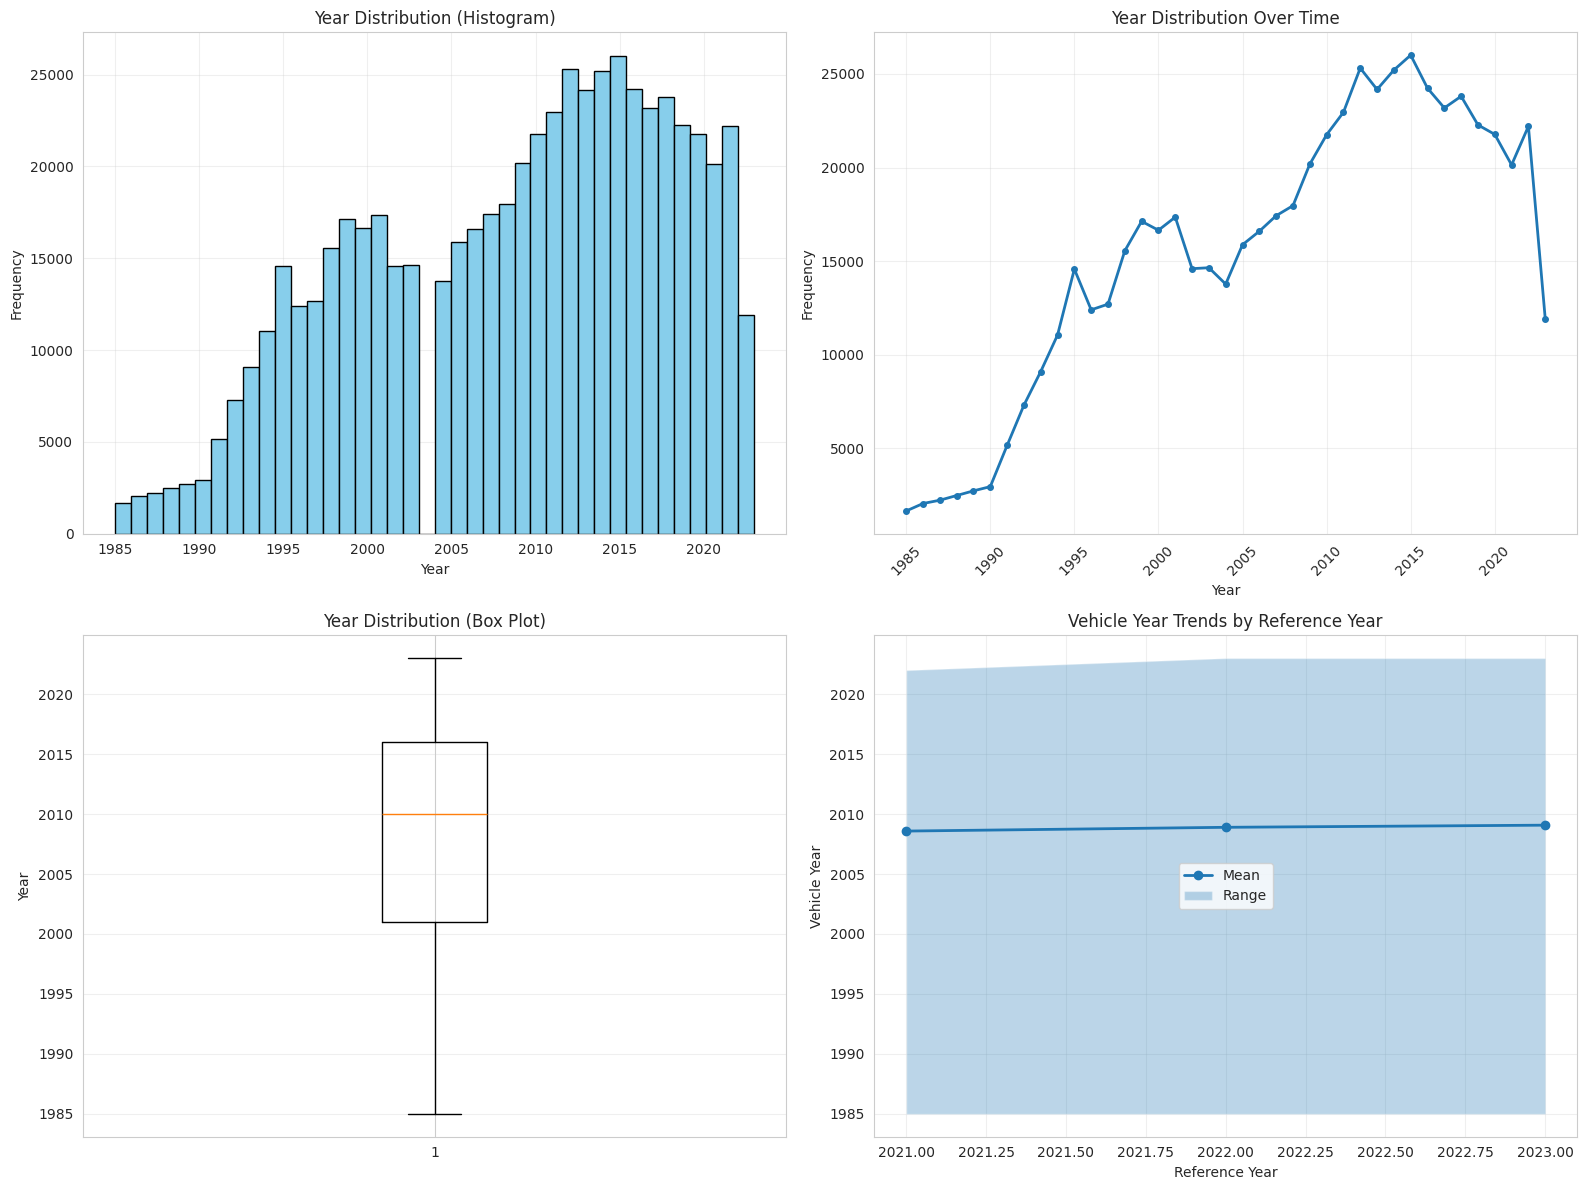


Year range: 1985 - 2023
Most common year: 2015 (26,005 occurrences)


In [14]:
# Year analysis
print("="*60)
print("Year Distribution Analysis")
print("="*60)

year_stats = df_cars['year'].describe()
print(f"\nYear statistics:")
print(f"  Min: {year_stats['min']:.0f}")
print(f"  Max: {year_stats['max']:.0f}")
print(f"  Mean: {year_stats['mean']:.2f}")
print(f"  Median: {year_stats['50%']:.0f}")
print(f"  Std: {year_stats['std']:.2f}")

year_counts = df_cars['year'].value_counts().sort_index()

# Visualize year distribution
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Histogram
axes[0, 0].hist(df_cars['year'], bins=40, edgecolor='black', color='skyblue')
axes[0, 0].set_xlabel('Year')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Year Distribution (Histogram)')
axes[0, 0].grid(True, alpha=0.3)

# Line plot showing trends
axes[0, 1].plot(year_counts.index, year_counts.values, marker='o', linewidth=2, markersize=4)
axes[0, 1].set_xlabel('Year')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('Year Distribution Over Time')
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].tick_params(axis='x', rotation=45)

# Box plot
axes[1, 0].boxplot(df_cars['year'], vert=True)
axes[1, 0].set_ylabel('Year')
axes[1, 0].set_title('Year Distribution (Box Plot)')
axes[1, 0].grid(True, alpha=0.3, axis='y')

# Year by reference year (to see trends)
year_by_ref = df_cars.groupby('year_of_reference')['year'].agg(['mean', 'min', 'max'])
axes[1, 1].plot(year_by_ref.index, year_by_ref['mean'], marker='o', label='Mean', linewidth=2)
axes[1, 1].fill_between(year_by_ref.index, year_by_ref['min'], year_by_ref['max'], alpha=0.3, label='Range')
axes[1, 1].set_xlabel('Reference Year')
axes[1, 1].set_ylabel('Vehicle Year')
axes[1, 1].set_title('Vehicle Year Trends by Reference Year')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nYear range: {df_cars['year'].min():.0f} - {df_cars['year'].max():.0f}")
print(f"Most common year: {year_counts.idxmax()} ({year_counts.max():,} occurrences)")


Mileage (km) Distribution Analysis

Mileage statistics:
  Min: 0 km
  Max: 559,200 km
  Mean: 142,956 km
  Median: 123,469 km
  Std: 102,062 km


/tmp/ipykernel_19/140937867.py:41: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_km_relationship = df_cars.groupby('age_bin')['km'].agg(['mean', 'median', 'std']).reset_index()


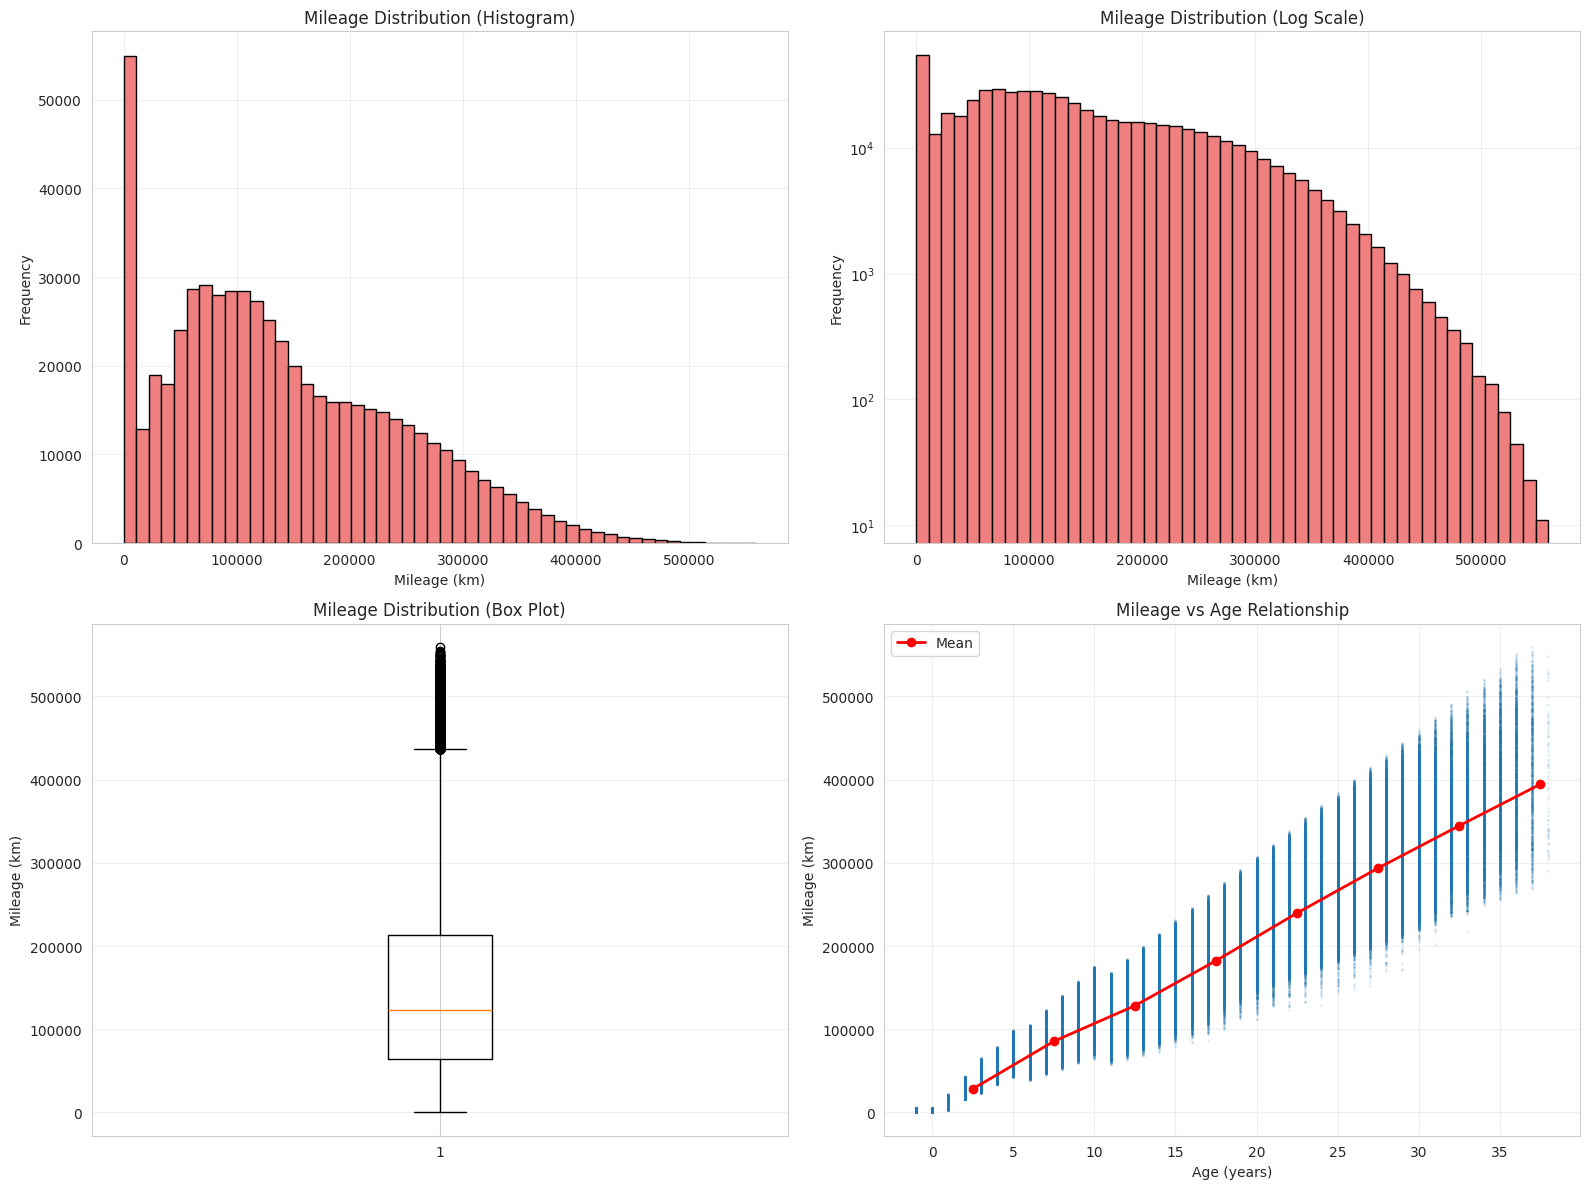


Average km per year (for age > 0): 10,172 km/year


In [15]:
# Mileage (km) analysis
print("="*60)
print("Mileage (km) Distribution Analysis")
print("="*60)

km_stats = df_cars['km'].describe()
print(f"\nMileage statistics:")
print(f"  Min: {km_stats['min']:,.0f} km")
print(f"  Max: {km_stats['max']:,.0f} km")
print(f"  Mean: {km_stats['mean']:,.0f} km")
print(f"  Median: {km_stats['50%']:,.0f} km")
print(f"  Std: {km_stats['std']:,.0f} km")

# Visualize mileage distribution
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Histogram
axes[0, 0].hist(df_cars['km'], bins=50, edgecolor='black', color='lightcoral')
axes[0, 0].set_xlabel('Mileage (km)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Mileage Distribution (Histogram)')
axes[0, 0].grid(True, alpha=0.3)

# Log scale histogram (to see distribution better)
axes[0, 1].hist(df_cars['km'], bins=50, edgecolor='black', color='lightcoral')
axes[0, 1].set_xlabel('Mileage (km)')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('Mileage Distribution (Log Scale)')
axes[0, 1].set_yscale('log')
axes[0, 1].grid(True, alpha=0.3)

# Box plot
axes[1, 0].boxplot(df_cars['km'], vert=True)
axes[1, 0].set_ylabel('Mileage (km)')
axes[1, 0].set_title('Mileage Distribution (Box Plot)')
axes[1, 0].grid(True, alpha=0.3, axis='y')

# Relationship between mileage and age
# Create age bins for better visualization
df_cars['age_bin'] = pd.cut(df_cars['age_years'], bins=range(0, 41, 5), right=False)
age_km_relationship = df_cars.groupby('age_bin')['km'].agg(['mean', 'median', 'std']).reset_index()
age_km_relationship['age_mid'] = age_km_relationship['age_bin'].apply(lambda x: x.mid)

axes[1, 1].scatter(df_cars['age_years'], df_cars['km'], alpha=0.1, s=1)
axes[1, 1].plot(age_km_relationship['age_mid'], age_km_relationship['mean'], 
                color='red', linewidth=2, label='Mean', marker='o')
axes[1, 1].set_xlabel('Age (years)')
axes[1, 1].set_ylabel('Mileage (km)')
axes[1, 1].set_title('Mileage vs Age Relationship')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Calculate km per year
df_cars['km_per_year'] = df_cars['km'] / (df_cars['age_years'] + 1)  # +1 to avoid division by zero
km_per_year_mean = df_cars[df_cars['age_years'] > 0]['km_per_year'].mean()
print(f"\nAverage km per year (for age > 0): {km_per_year_mean:,.0f} km/year")


Engine Size Distribution Analysis

Engine size statistics:
  Min: 0.70L
  Max: 6.70L
  Mean: 2.27L
  Median: 2.00L
  Std: 1.03L


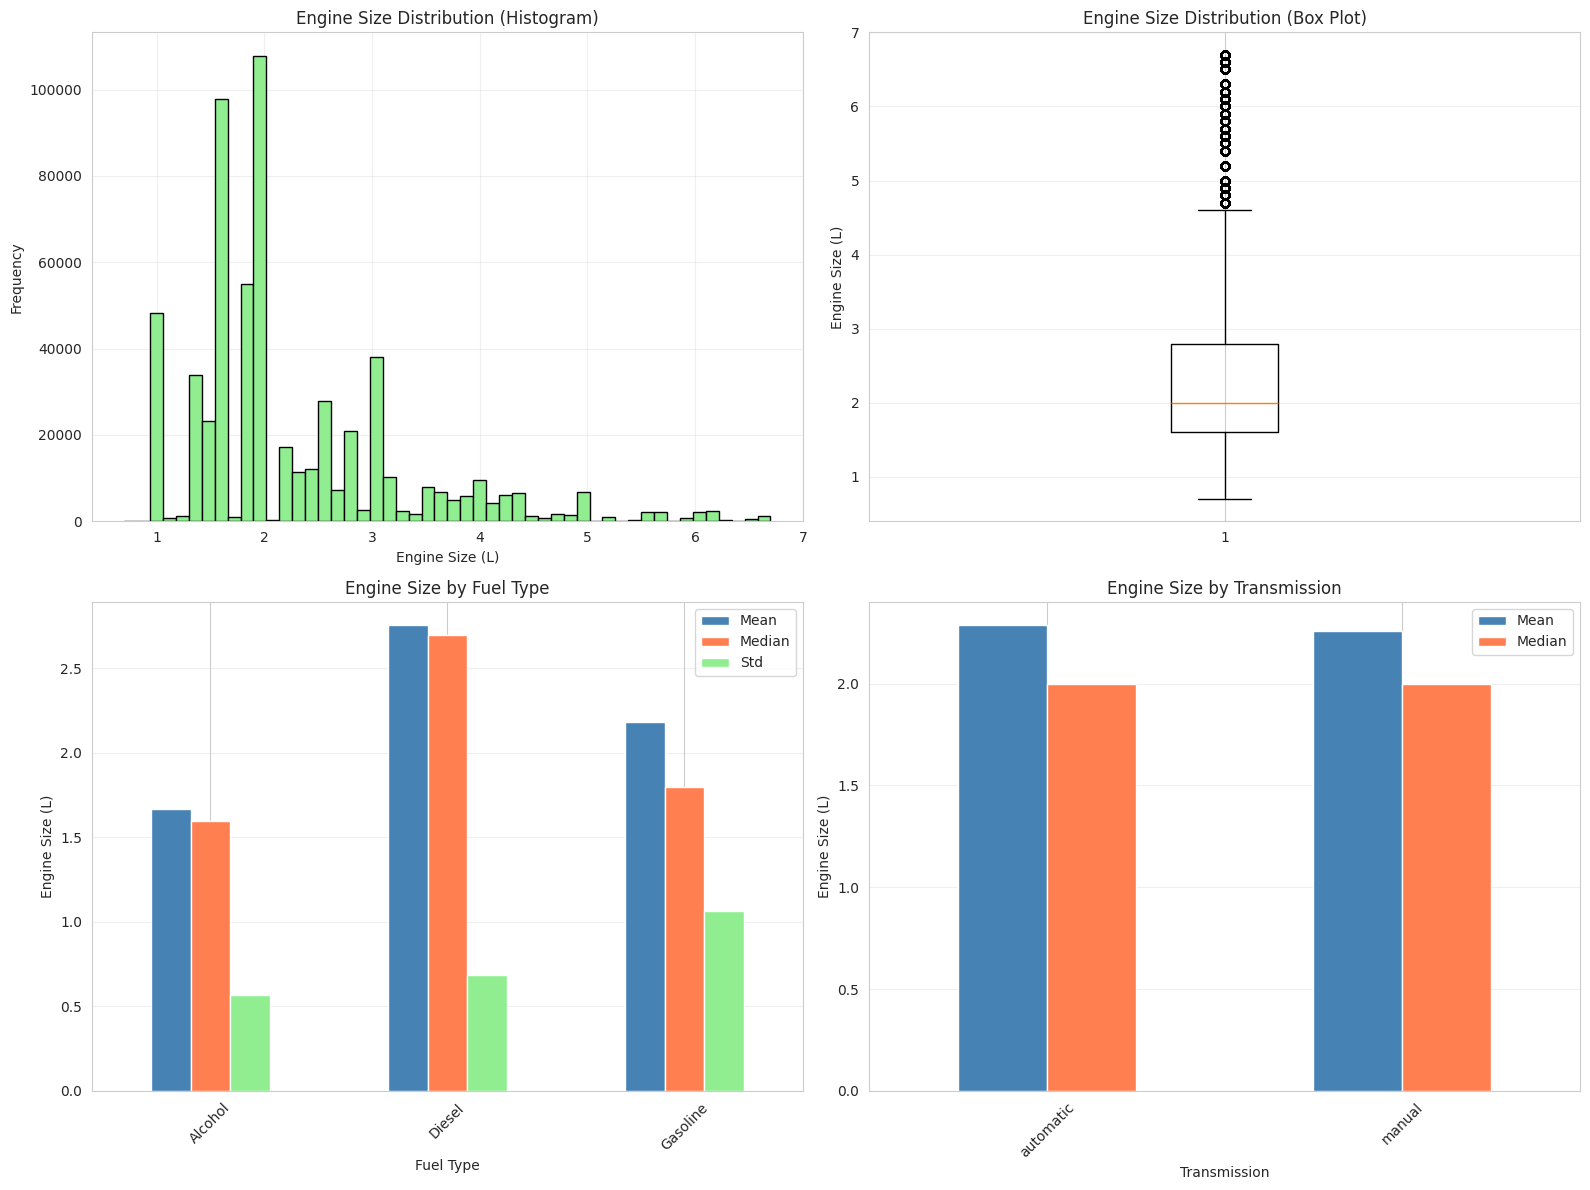


Top 10 most common engine sizes:
  2.00L: 106,120 (17.72%)
  1.60L: 97,861 (16.34%)
  1.80L: 54,908 (9.17%)
  1.00L: 48,363 (8.07%)
  3.00L: 38,047 (6.35%)
  2.50L: 27,072 (4.52%)
  1.40L: 25,159 (4.20%)
  1.50L: 23,261 (3.88%)
  2.80L: 20,889 (3.49%)
  2.20L: 17,309 (2.89%)


In [16]:
# Engine size analysis
print("="*60)
print("Engine Size Distribution Analysis")
print("="*60)

engine_stats = df_cars['engine_size'].describe()
print(f"\nEngine size statistics:")
print(f"  Min: {engine_stats['min']:.2f}L")
print(f"  Max: {engine_stats['max']:.2f}L")
print(f"  Mean: {engine_stats['mean']:.2f}L")
print(f"  Median: {engine_stats['50%']:.2f}L")
print(f"  Std: {engine_stats['std']:.2f}L")

# Visualize engine size distribution
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Histogram
axes[0, 0].hist(df_cars['engine_size'], bins=50, edgecolor='black', color='lightgreen')
axes[0, 0].set_xlabel('Engine Size (L)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Engine Size Distribution (Histogram)')
axes[0, 0].grid(True, alpha=0.3)

# Box plot
axes[0, 1].boxplot(df_cars['engine_size'], vert=True)
axes[0, 1].set_ylabel('Engine Size (L)')
axes[0, 1].set_title('Engine Size Distribution (Box Plot)')
axes[0, 1].grid(True, alpha=0.3, axis='y')

# Distribution by fuel type
fuel_engine = df_cars.groupby('fuel_type')['engine_size'].agg(['mean', 'median', 'std'])
fuel_engine.plot(kind='bar', ax=axes[1, 0], color=['steelblue', 'coral', 'lightgreen'])
axes[1, 0].set_xlabel('Fuel Type')
axes[1, 0].set_ylabel('Engine Size (L)')
axes[1, 0].set_title('Engine Size by Fuel Type')
axes[1, 0].legend(['Mean', 'Median', 'Std'])
axes[1, 0].grid(True, alpha=0.3, axis='y')
axes[1, 0].tick_params(axis='x', rotation=45)

# Distribution by transmission
transmission_engine = df_cars.groupby('transmission')['engine_size'].agg(['mean', 'median'])
transmission_engine.plot(kind='bar', ax=axes[1, 1], color=['steelblue', 'coral'])
axes[1, 1].set_xlabel('Transmission')
axes[1, 1].set_ylabel('Engine Size (L)')
axes[1, 1].set_title('Engine Size by Transmission')
axes[1, 1].legend(['Mean', 'Median'])
axes[1, 1].grid(True, alpha=0.3, axis='y')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Most common engine sizes
engine_counts = df_cars['engine_size'].value_counts().head(10)
print(f"\nTop 10 most common engine sizes:")
for size, count in engine_counts.items():
    pct = (count / len(df_cars)) * 100
    print(f"  {size:.2f}L: {count:,} ({pct:.2f}%)")


### 3.4 Doors Distribution


Doors Distribution Analysis

Doors statistics:
  Min: 2
  Max: 5
  Mean: 4.00
  Median: 4
  Std: 0.55

Doors distribution:
------------------------------------------------------------
2 doors:   29,981 ( 5.01%)
4 doors:  508,958 (84.97%)
5 doors:   60,068 (10.03%)


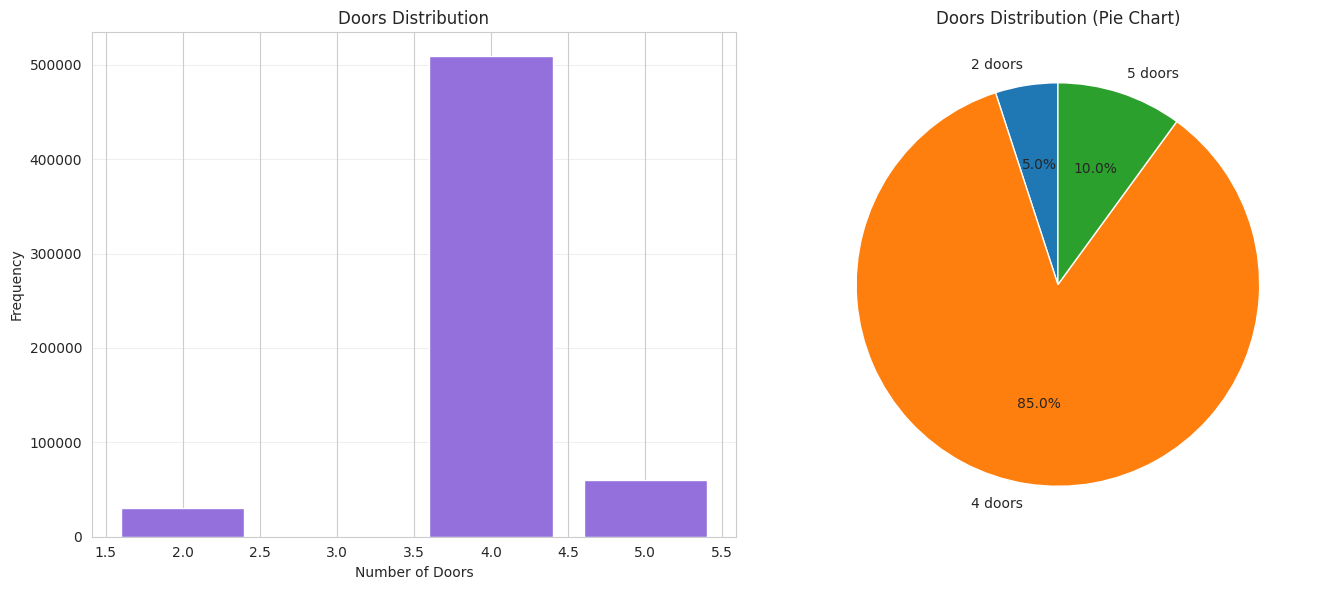

In [17]:
# Doors analysis
print("="*60)
print("Doors Distribution Analysis")
print("="*60)

doors_stats = df_cars['doors'].describe()
doors_counts = df_cars['doors'].value_counts().sort_index()
doors_pct = (doors_counts / len(df_cars)) * 100

print(f"\nDoors statistics:")
print(f"  Min: {doors_stats['min']:.0f}")
print(f"  Max: {doors_stats['max']:.0f}")
print(f"  Mean: {doors_stats['mean']:.2f}")
print(f"  Median: {doors_stats['50%']:.0f}")
print(f"  Std: {doors_stats['std']:.2f}")

print(f"\nDoors distribution:")
print("-" * 60)
for doors, count in doors_counts.items():
    pct = doors_pct[doors]
    print(f"{doors} doors: {count:8,} ({pct:5.2f}%)")

# Visualize doors distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Bar plot
axes[0].bar(doors_counts.index, doors_counts.values, color='mediumpurple')
axes[0].set_xlabel('Number of Doors')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Doors Distribution')
axes[0].grid(True, alpha=0.3, axis='y')

# Pie chart
axes[1].pie(doors_counts.values, labels=[f'{d} doors' for d in doors_counts.index], 
            autopct='%1.1f%%', startangle=90)
axes[1].set_title('Doors Distribution (Pie Chart)')

plt.tight_layout()
plt.show()


### 3.5 Age Distribution


Age Distribution Analysis

Age statistics:
  Min: -1 years
  Max: 38 years
  Mean: 12.81 years
  Median: 11 years
  Std: 9.20 years


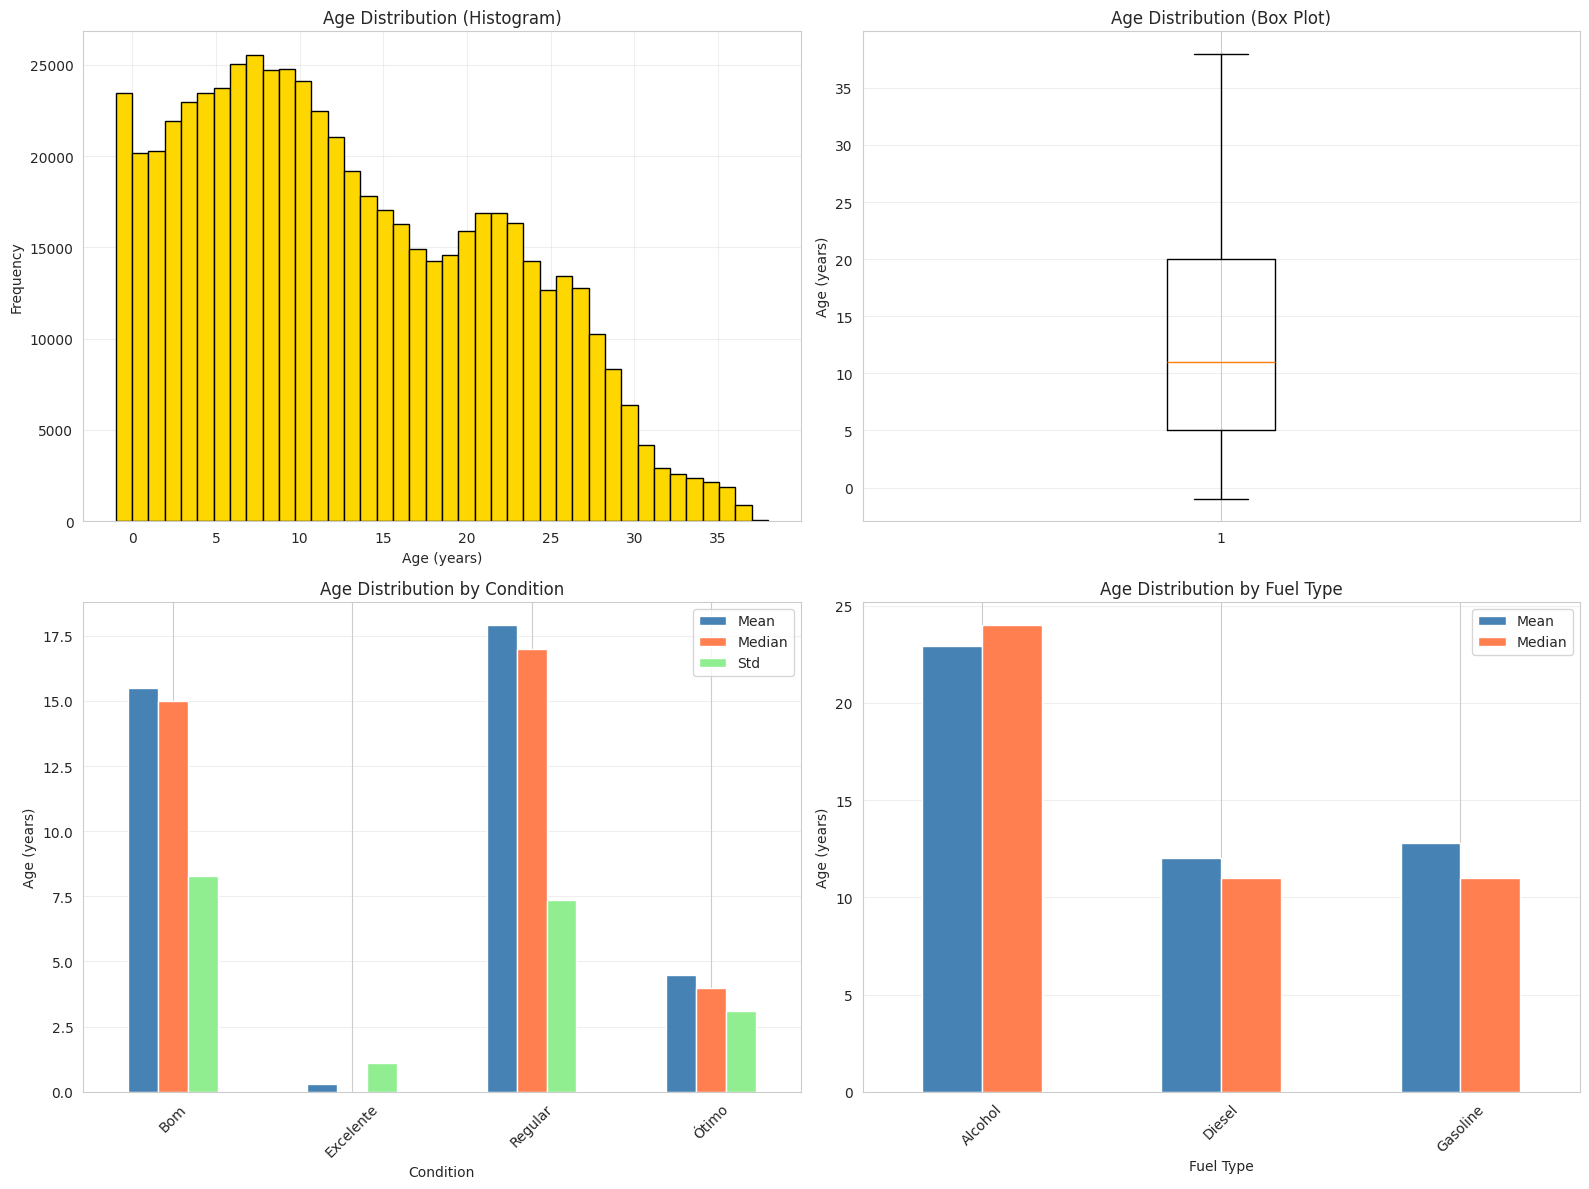


⚠️  Warning: Found 23443 records with negative age!


In [18]:
# Age analysis
print("="*60)
print("Age Distribution Analysis")
print("="*60)

age_stats = df_cars['age_years'].describe()
print(f"\nAge statistics:")
print(f"  Min: {age_stats['min']:.0f} years")
print(f"  Max: {age_stats['max']:.0f} years")
print(f"  Mean: {age_stats['mean']:.2f} years")
print(f"  Median: {age_stats['50%']:.0f} years")
print(f"  Std: {age_stats['std']:.2f} years")

# Visualize age distribution
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Histogram
axes[0, 0].hist(df_cars['age_years'], bins=40, edgecolor='black', color='gold')
axes[0, 0].set_xlabel('Age (years)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Age Distribution (Histogram)')
axes[0, 0].grid(True, alpha=0.3)

# Box plot
axes[0, 1].boxplot(df_cars['age_years'], vert=True)
axes[0, 1].set_ylabel('Age (years)')
axes[0, 1].set_title('Age Distribution (Box Plot)')
axes[0, 1].grid(True, alpha=0.3, axis='y')

# Age distribution by condition
condition_age = df_cars.groupby('condition')['age_years'].agg(['mean', 'median', 'std'])
condition_age.plot(kind='bar', ax=axes[1, 0], color=['steelblue', 'coral', 'lightgreen', 'gold'])
axes[1, 0].set_xlabel('Condition')
axes[1, 0].set_ylabel('Age (years)')
axes[1, 0].set_title('Age Distribution by Condition')
axes[1, 0].legend(['Mean', 'Median', 'Std'])
axes[1, 0].grid(True, alpha=0.3, axis='y')
axes[1, 0].tick_params(axis='x', rotation=45)

# Age distribution by fuel type
fuel_age = df_cars.groupby('fuel_type')['age_years'].agg(['mean', 'median'])
fuel_age.plot(kind='bar', ax=axes[1, 1], color=['steelblue', 'coral'])
axes[1, 1].set_xlabel('Fuel Type')
axes[1, 1].set_ylabel('Age (years)')
axes[1, 1].set_title('Age Distribution by Fuel Type')
axes[1, 1].legend(['Mean', 'Median'])
axes[1, 1].grid(True, alpha=0.3, axis='y')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Check for negative ages (shouldn't exist but let's verify)
negative_ages = (df_cars['age_years'] < 0).sum()
if negative_ages > 0:
    print(f"\n⚠️  Warning: Found {negative_ages} records with negative age!")
else:
    print(f"\n✅ No negative ages found")


## 4. Summary and Key Findings


In [19]:
print("="*60)
print("SUMMARY - Feature Analysis")
print("="*60)

print("\n📊 Categorical Features Summary:")
print(f"  • Total categorical features: {len(categorical_cols)}")
print(f"  • Brand: {df_cars['brand'].nunique()} unique values")
print(f"  • Model: {df_cars['model'].nunique()} unique values (high cardinality)")
print(f"  • State: {df_cars['state'].nunique()} unique values")
print(f"  • City: {df_cars['city'].nunique()} unique values")
print(f"  • Fuel type: {df_cars['fuel_type'].nunique()} unique values")
print(f"  • Transmission: {df_cars['transmission'].nunique()} unique values")
print(f"  • Color: {df_cars['color'].nunique()} unique values")
print(f"  • Condition: {df_cars['condition'].nunique()} unique values")

print("\n📈 Numerical Features Summary:")
print(f"  • Total numerical features: {len(numerical_cols)}")
print(f"  • Year range: {df_cars['year'].min():.0f} - {df_cars['year'].max():.0f}")
print(f"  • Mileage range: {df_cars['km'].min():,.0f} - {df_cars['km'].max():,.0f} km")
print(f"  • Engine size range: {df_cars['engine_size'].min():.2f} - {df_cars['engine_size'].max():.2f}L")
print(f"  • Doors: {df_cars['doors'].min():.0f} - {df_cars['doors'].max():.0f}")
print(f"  • Age range: {df_cars['age_years'].min():.0f} - {df_cars['age_years'].max():.0f} years")

print("\n🔍 Key Observations:")
print("  → Model has very high cardinality (6171 unique values)")
print("  → Brand and model show high concentration (top brands/models dominate)")
print("  → Most cars have 4 doors")
print("  → Gasoline is the dominant fuel type")
print("  → Manual transmission is more common than automatic")
print("  → White is the most common color")
print("  → Mileage shows strong relationship with vehicle age")

print("\n" + "="*60)
print("Next Steps:")
print("  → Proceed to notebook 04_correlations.ipynb")
print("  → Analyze relationships between features and target")
print("  → Explore feature interactions")
print("="*60)


SUMMARY - Feature Analysis

📊 Categorical Features Summary:
  • Total categorical features: 9
  • Brand: 87 unique values
  • Model: 6171 unique values (high cardinality)
  • State: 27 unique values
  • City: 131 unique values
  • Fuel type: 3 unique values
  • Transmission: 2 unique values
  • Color: 10 unique values
  • Condition: 4 unique values

📈 Numerical Features Summary:
  • Total numerical features: 6
  • Year range: 1985 - 2023
  • Mileage range: 0 - 559,200 km
  • Engine size range: 0.70 - 6.70L
  • Doors: 2 - 5
  • Age range: -1 - 38 years

🔍 Key Observations:
  → Model has very high cardinality (6171 unique values)
  → Brand and model show high concentration (top brands/models dominate)
  → Most cars have 4 doors
  → Gasoline is the dominant fuel type
  → Manual transmission is more common than automatic
  → White is the most common color
  → Mileage shows strong relationship with vehicle age

Next Steps:
  → Proceed to notebook 04_correlations.ipynb
  → Analyze relationsh